In [ ]:
#intall ytdl in environment
!pip install yt-dlp
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import os
from pathlib import Path
import tensorflow as tf
from tensorflow import keras
from yt_dlp import YoutubeDL
from sklearn.metrics import confusion_matrix

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#load in dataframe with songs and links
yt_test = pd.read_csv('/content/drive/MyDrive/ML data/test_ytlinks.csv')
yt_test

,TRACK_NAME,ARTIST_NAME,yt_link,ambient_chill,classical_orchestral,electronic_edm,folk_country,funk_soul_rnb,hiphop_rap,jazz_fusion,metal,pop,rock_punk
0,Renegade Day,Solxis,https://youtu.be/gAE8Ce8atjs?si=IjYO5c941b9tbDVH,False,False,True,False,False,False,False,False,False,False
1,ANOTHER WORLD,LukHash,https://youtu.be/3C58iB3Kww4?si=BZnCW2hCNhkEV5om,False,False,False,False,False,False,False,False,True,False
2,God Save The DJ,WE ARE FM,https://youtu.be/tbKOpbfzyos?si=J-Wx4qtJbOSkJx0p,False,False,True,False,False,False,False,False,False,False
3,Ballad of Contrasts,Udo Vismann,https://youtu.be/Pxqfydb_zo0?si=i5ejaqIszmRD1veF,True,False,False,False,False,False,False,False,False,False
4,Deep Pools,Podington Bear,https://youtu.be/Q9HPXBZa0vA?si=7LtritMGndNzMyU3,True,False,False,False,False,False,False,False,False,False
5,Crossing the Universe,Esther Garcia,https://youtu.be/WADSgS53pi8?si=AizWgwtZPVcQLWQn,False,True,False,False,False,False,False,False,False,False
6,"Chopin Piano Scherzo No. 3 in C-sharp minor, O...",Kranto studijos,https://www.youtube.com/watch?v=a96LHiKOMrc&li...,False,True,False,False,False,False,False,False,False,False
7,acuna,Hombre Lobo,https://www.youtube.com/watch?v=7l3V7qOrUQ4&t=1s,False,False,False,True,False,False,False,False,False,False
8,Nyash Drop,Young Paperboyz,https://youtu.be/yFf8naZkYKU?si=CKCxsCmpj4osaVTc,False,False,False,False,False,True,False,False,False,False
9,Party All Night feat G. Staxs,Demo Delgado,https://youtu.be/_8P0GXdI5AY?si=OJfzxqPD3h47zTas,False,False,False,False,False,True,False,False,False,False


In [14]:
#add column for filepath
folder = '/content/drive/MyDrive/ML data/test_downloaded_audio'
paths = []
for track in yt_test['TRACK_NAME']:
  paths.append(os.path.join(folder, track + '.mp3'))
yt_test['filepath'] = paths
yt_test

,TRACK_NAME,ARTIST_NAME,yt_link,ambient_chill,classical_orchestral,electronic_edm,folk_country,funk_soul_rnb,hiphop_rap,jazz_fusion,metal,pop,rock_punk,filepath
0,Renegade Day,Solxis,https://youtu.be/gAE8Ce8atjs?si=IjYO5c941b9tbDVH,False,False,True,False,False,False,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
1,ANOTHER WORLD,LukHash,https://youtu.be/3C58iB3Kww4?si=BZnCW2hCNhkEV5om,False,False,False,False,False,False,False,False,True,False,/content/drive/MyDrive/ML data/test_downloaded...
2,God Save The DJ,WE ARE FM,https://youtu.be/tbKOpbfzyos?si=J-Wx4qtJbOSkJx0p,False,False,True,False,False,False,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
3,Ballad of Contrasts,Udo Vismann,https://youtu.be/Pxqfydb_zo0?si=i5ejaqIszmRD1veF,True,False,False,False,False,False,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
4,Deep Pools,Podington Bear,https://youtu.be/Q9HPXBZa0vA?si=7LtritMGndNzMyU3,True,False,False,False,False,False,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
5,Crossing the Universe,Esther Garcia,https://youtu.be/WADSgS53pi8?si=AizWgwtZPVcQLWQn,False,True,False,False,False,False,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
6,"Chopin Piano Scherzo No. 3 in C-sharp minor, O...",Kranto studijos,https://www.youtube.com/watch?v=a96LHiKOMrc&li...,False,True,False,False,False,False,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
7,acuna,Hombre Lobo,https://www.youtube.com/watch?v=7l3V7qOrUQ4&t=1s,False,False,False,True,False,False,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
8,Nyash Drop,Young Paperboyz,https://youtu.be/yFf8naZkYKU?si=CKCxsCmpj4osaVTc,False,False,False,False,False,True,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
9,Party All Night feat G. Staxs,Demo Delgado,https://youtu.be/_8P0GXdI5AY?si=OJfzxqPD3h47zTas,False,False,False,False,False,True,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...


In [15]:
sr = 22050
def make_melspec(filepath, sr = sr):
  y, sr = librosa.load(filepath)
  melspec = librosa.feature.melspectrogram(y=y,
                                           sr=sr,
                                           n_fft=2048,
                                           hop_length=512,
                                           n_mels=96,
                                           fmax=sr // 2)
  melspec = librosa.power_to_db(melspec, ref=np.max)
  return melspec

In [18]:
#make spectrograms
melspec_df = []
for i in range(len(yt_test)):
  melspec_df.append(make_melspec(yt_test['filepath'][i]))
  print(i, 'songs converted')

0 songs converted
1 songs converted
2 songs converted
3 songs converted
4 songs converted
5 songs converted
6 songs converted
7 songs converted
8 songs converted
9 songs converted
10 songs converted
11 songs converted
12 songs converted


In [23]:
#normalize spectrograms
for i in range(len(melspec_df)):
  melspec_df[i] = (melspec_df[i] - np.mean(melspec_df[i])) / np.std(melspec_df[i])

In [28]:
#chop spectrograms into length of 1400
min_length = 1400
songs_final = []
specs = []
for i in range(len(melspec_df)):
  spec = melspec_df[i]
  title = yt_test['TRACK_NAME'][i]
  length = melspec_df[i].shape[1]
  if length <= min_length:
    songs_final.append(title)
    specs.append(spec)
  else:
    for j in range(length // min_length):
      songs_final.append(title)
      specs.append(spec[:, j*min_length:(j+1)*min_length])
#confirm shapes
print('total clips:', len(songs_final))
print('total spectrograms:',len(specs))

total clips: 93
total spectrograms: 93


In [29]:
#load in model
model = keras.models.load_model("/content/drive/MyDrive/ML data/purecnn_10class.keras") #best model with about 47 percent accuracy

In [35]:
genres = ['ambient_chill',
          'classical_orchestral',
          'electronic_edm',
          'folk_country',
          'funk_soul_rnb',
          'hiphop_rap',
          'jazz_fusion',
          'metal',
          'pop',
          'rock_punk']
#predict genre
yt_pred = model.predict(np.array(specs))
yt_pred = pd.DataFrame(yt_pred, columns=genres)
yt_pred["Title"] = songs_final


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


In [36]:
yt_pred

,ambient_chill,classical_orchestral,electronic_edm,folk_country,funk_soul_rnb,hiphop_rap,jazz_fusion,metal,pop,rock_punk,Title
0,0.167153,0.051949,0.184410,0.043671,0.027577,0.108020,0.029592,0.051380,0.261435,0.074812,Renegade Day
1,0.184449,0.067292,0.327686,0.021660,0.009636,0.016344,0.020344,0.077838,0.207061,0.067690,Renegade Day
2,0.150273,0.027454,0.193716,0.036986,0.061216,0.134139,0.055271,0.039574,0.230976,0.070396,Renegade Day
3,0.146988,0.022533,0.342407,0.011556,0.023264,0.082255,0.015146,0.036166,0.276780,0.042904,Renegade Day
4,0.168531,0.057519,0.277581,0.037043,0.019141,0.010591,0.053763,0.078352,0.215189,0.082290,Renegade Day
...,...,...,...,...,...,...,...,...,...,...,...
88,0.002189,0.000793,0.000032,0.835793,0.000034,0.000395,0.003252,0.000588,0.138158,0.018767,Our World
89,0.001046,0.000433,0.000079,0.795598,0.000744,0.002202,0.011922,0.001514,0.148362,0.038101,Our World
90,0.000732,0.000172,0.000060,0.723678,0.000274,0.003995,0.006994,0.004291,0.185043,0.074761,Our World
91,0.003952,0.001646,0.000107,0.789813,0.000124,0.000955,0.006392,0.001480,0.165247,0.030285,Our World


In [37]:
#convert max in each numerical row to 1, everything else to zero
#convert max in each row to 1 and everthing else to 0

# Separate the 'Title' column as it's not a numerical genre column
titles = yt_pred['Title']

# Drop the 'Title' column temporarily for numerical operations
yt_pred_genres = yt_pred.drop(columns=['Title'])

# Apply normalization to genre probabilities (divide by the max in each row)
yt_pred_genres = yt_pred_genres.apply(lambda x: x / x.max(), axis=1)

# Convert all non-maximal values to 0, effectively binarizing the max to 1
yt_pred_genres[yt_pred_genres != 1] = 0

# Recombine with the 'Title' column
yt_pred = pd.concat([yt_pred_genres, titles], axis=1)
yt_pred

,ambient_chill,classical_orchestral,electronic_edm,folk_country,funk_soul_rnb,hiphop_rap,jazz_fusion,metal,pop,rock_punk,Title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Renegade Day
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Renegade Day
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Renegade Day
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Renegade Day
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Renegade Day
...,...,...,...,...,...,...,...,...,...,...,...
88,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Our World
89,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Our World
90,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Our World
91,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Our World


In [38]:
#sum based on title
yt_pred = yt_pred.groupby('Title').sum()
yt_pred

,ambient_chill,classical_orchestral,electronic_edm,folk_country,funk_soul_rnb,hiphop_rap,jazz_fusion,metal,pop,rock_punk
Title,,,,,,,,,,
ANOTHER WORLD,0.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0
Ballad of Contrasts,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
"Chopin Piano Scherzo No. 3 in C-sharp minor, Op. 39 (7:56)",0.0,13.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Crossing the Universe,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Deep Pools,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
God Save The DJ,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,2.0
Nyash Drop,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0
Our World,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
Party All Night feat G. Staxs,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0


In [41]:
#convert max in each row to 1
yt_pred_hard = yt_pred.eq(yt_pred.max(axis=1), axis=0).astype(int)
yt_pred_hard

,ambient_chill,classical_orchestral,electronic_edm,folk_country,funk_soul_rnb,hiphop_rap,jazz_fusion,metal,pop,rock_punk
Title,,,,,,,,,,
ANOTHER WORLD,0,0,1,0,0,1,0,0,0,0
Ballad of Contrasts,0,1,0,1,0,0,0,0,0,0
"Chopin Piano Scherzo No. 3 in C-sharp minor, Op. 39 (7:56)",0,1,0,0,0,0,0,0,0,0
Crossing the Universe,0,1,0,0,0,0,0,0,0,0
Deep Pools,0,0,0,1,0,0,0,0,0,0
God Save The DJ,0,0,0,1,0,0,0,0,0,0
Nyash Drop,0,0,0,1,0,0,0,0,0,0
Our World,0,0,0,1,0,0,0,0,0,0
Party All Night feat G. Staxs,0,0,0,0,0,1,0,0,0,0


In [40]:
#print song titles and their primary genres
for i in range(len(yt_pred)):
  print(yt_pred.index[i], ': ', yt_pred.columns[np.argmax(yt_pred.iloc[i])])

ANOTHER WORLD :  electronic_edm
Ballad of Contrasts :  classical_orchestral
Chopin Piano Scherzo No. 3 in C-sharp minor, Op. 39 (7:56) :  classical_orchestral
Crossing the Universe :  classical_orchestral
Deep Pools :  folk_country
God Save The DJ :  folk_country
Nyash Drop :  folk_country
Our World :  folk_country
Party All Night feat G. Staxs :  hiphop_rap
Renegade Day :  electronic_edm
Through the storm :  hiphop_rap
Under Control :  folk_country
acuna :  folk_country


In [43]:
yt_true = yt_test.drop(columns=['ARTIST_NAME', 'yt_link'])

,TRACK_NAME,ambient_chill,classical_orchestral,electronic_edm,folk_country,funk_soul_rnb,hiphop_rap,jazz_fusion,metal,pop,rock_punk,filepath
0,Renegade Day,False,False,True,False,False,False,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
1,ANOTHER WORLD,False,False,False,False,False,False,False,False,True,False,/content/drive/MyDrive/ML data/test_downloaded...
2,God Save The DJ,False,False,True,False,False,False,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
3,Ballad of Contrasts,True,False,False,False,False,False,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
4,Deep Pools,True,False,False,False,False,False,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
5,Crossing the Universe,False,True,False,False,False,False,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
6,"Chopin Piano Scherzo No. 3 in C-sharp minor, O...",False,True,False,False,False,False,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
7,acuna,False,False,False,True,False,False,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
8,Nyash Drop,False,False,False,False,False,True,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
9,Party All Night feat G. Staxs,False,False,False,False,False,True,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...


In [44]:
#sort by title alhpha
yt_true = yt_true.sort_values(by=['TRACK_NAME'])
yt_true = yt_true.reset_index(drop=True)
yt_true

,TRACK_NAME,ambient_chill,classical_orchestral,electronic_edm,folk_country,funk_soul_rnb,hiphop_rap,jazz_fusion,metal,pop,rock_punk,filepath
0,ANOTHER WORLD,False,False,False,False,False,False,False,False,True,False,/content/drive/MyDrive/ML data/test_downloaded...
1,Ballad of Contrasts,True,False,False,False,False,False,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
2,"Chopin Piano Scherzo No. 3 in C-sharp minor, O...",False,True,False,False,False,False,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
3,Crossing the Universe,False,True,False,False,False,False,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
4,Deep Pools,True,False,False,False,False,False,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
5,God Save The DJ,False,False,True,False,False,False,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
6,Nyash Drop,False,False,False,False,False,True,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
7,Our World,False,False,False,False,False,False,False,False,False,True,/content/drive/MyDrive/ML data/test_downloaded...
8,Party All Night feat G. Staxs,False,False,False,False,False,True,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...
9,Renegade Day,False,False,True,False,False,False,False,False,False,False,/content/drive/MyDrive/ML data/test_downloaded...


In [45]:
yt_true = yt_true.drop(columns=['TRACK_NAME'])

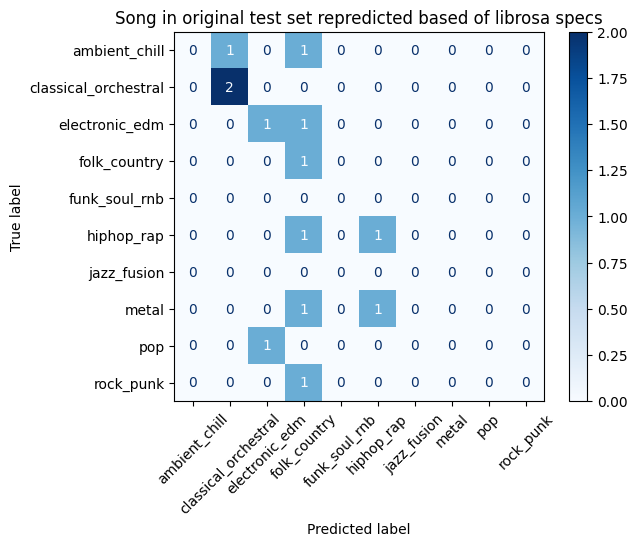

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Exclude the 'filepath' column before converting to integer class labels
y_true_genres = yt_true.drop(columns=['filepath'])
yt_true_labels = np.argmax(y_true_genres.values, axis=1)
yt_pred_hard_labels = np.argmax(yt_pred_hard.values, axis=1)

# Create a range of all possible class labels (0 to 9) to ensure the confusion matrix has the correct dimensions
all_class_labels = range(len(genres))

cm = confusion_matrix(yt_true_labels, yt_pred_hard_labels, labels=all_class_labels)
disp = ConfusionMatrixDisplay(cm, display_labels=genres)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Song in original test set repredicted based of librosa specs')
plt.show()